# ML4TB project
# Code for MLP, NN, GBM ML models

In [1]:
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow.keras.wrappers.scikit_learn')


import tensorflow as tf



tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(1)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from scipy import stats
from scipy.stats import kurtosis




from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve,auc, make_scorer,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA, NMF, FastICA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import warnings
import pickle
from sklearn.pipeline import Pipeline



import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

tf.get_logger().setLevel('ERROR')
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

2025-04-24 18:47:27.186665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745516847.205222  630433 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745516847.210919  630433 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745516847.226712  630433 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745516847.226726  630433 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745516847.226728  630433 computation_placer.cc:177] computation placer alr

In [2]:
def create_nn_model(neurons1, neurons2, neurons3, optimizer):
    model = Sequential()
    model.add(Input(shape=(train_data.shape[1],)))  # Input layer
    model.add(Dense(neurons1, activation = "relu"))
    model.add(Dense(neurons2, activation = "relu"))
    model.add(Dense(neurons3, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    model.compile(loss = "binary_crossentropy",
                  optimizer = optimizer,
                  metrics = ["accuracy"])
    return model


nn_param_grid = {"model__neurons1": [2,4,8,16,32, 64, 128, 256, 512, 1024],
                 "model__neurons2": [2,4,8,16,32, 64, 128, 256, 512, 1024],
                 "model__neurons3": [2,4,8,16,32, 64, 128, 256, 512, 1024],
                 "model__optimizer": ["SGD", "RMSprop", "Adam"]}

In [3]:
train_data = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/train_normalised_filtered_counts.txt", sep = "\t")
train_data_F1 = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/train_normalised_filtered_counts_Fold1.txt", sep = "\t")
train_data_F2 = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/train_normalised_filtered_counts_Fold2.txt", sep = "\t")
train_data_F3 = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/train_normalised_filtered_counts_Fold3.txt", sep = "\t")
train_data_F4 = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/train_normalised_filtered_counts_Fold4.txt", sep = "\t")
train_data_F5 = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/train_normalised_filtered_counts_Fold5.txt", sep = "\t")
fold1_array = np.array(pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/Fold1_integers.txt",header=None)).ravel() -1
fold2_array = np.array(pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/Fold2_integers.txt",header=None)).ravel() -1
fold3_array = np.array(pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/Fold3_integers.txt",header=None)).ravel() -1
fold4_array = np.array(pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/Fold4_integers.txt",header=None)).ravel() -1
fold5_array = np.array(pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/Fold5_integers.txt",header=None)).ravel() -1

all_indices = np.arange(train_data.shape[0] -1)
fold1_array_test = np.setdiff1d(all_indices, fold1_array)
fold2_array_test = np.setdiff1d(all_indices, fold2_array)
fold3_array_test = np.setdiff1d(all_indices, fold3_array)
fold4_array_test = np.setdiff1d(all_indices, fold4_array)
fold5_array_test = np.setdiff1d(all_indices, fold5_array)

cv_splits = [(np.array(fold1_array), np.array(fold1_array_test)),
(np.array(fold2_array), np.array(fold2_array_test)),
(np.array(fold3_array), np.array(fold3_array_test)),
(np.array(fold4_array), np.array(fold4_array_test)),
(np.array(fold5_array), np.array(fold5_array_test))]

# labels
train_labels = train_data["Condition"].map({"Control": 0, "Infected": 1}).to_numpy()
train_data = train_data.drop("Condition", axis=1)

test_data = pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/test_normalised_filtered_counts.txt", sep = "\t")
test_labels = np.array(pd.read_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/Test_set_labels.txt", header = None)).ravel()
test_labels = np.where(test_labels == "Control", 0, 1)

In [16]:
from itertools import product, permutations

# Define the hidden layer sizes you want to combine
layer_sizes = [8, 16, 32, 64, 128, 256, 512]

# Generate all 3-layer combinations, then filter to keep only decreasing ones
# permutations will generate all combinations, we filter those that are strictly decreasing
hidden_layer_combinations = [
    combo for combo in permutations(layer_sizes, 3)
    if combo[0] > combo[1] > combo[2] or combo[0] == combo[1] == combo[2]
]
hidden_layer_combinations

[(32, 16, 8),
 (64, 16, 8),
 (64, 32, 8),
 (64, 32, 16),
 (128, 16, 8),
 (128, 32, 8),
 (128, 32, 16),
 (128, 64, 8),
 (128, 64, 16),
 (128, 64, 32),
 (256, 16, 8),
 (256, 32, 8),
 (256, 32, 16),
 (256, 64, 8),
 (256, 64, 16),
 (256, 64, 32),
 (256, 128, 8),
 (256, 128, 16),
 (256, 128, 32),
 (256, 128, 64),
 (512, 16, 8),
 (512, 32, 8),
 (512, 32, 16),
 (512, 64, 8),
 (512, 64, 16),
 (512, 64, 32),
 (512, 128, 8),
 (512, 128, 16),
 (512, 128, 32),
 (512, 128, 64),
 (512, 256, 8),
 (512, 256, 16),
 (512, 256, 32),
 (512, 256, 64),
 (512, 256, 128)]

In [17]:

mlpc_params = {"alpha": [1,0.1, 0.01, 0.0001,0.00001],
              "hidden_layer_sizes": [(8),
                                     (16),
                                     (32),
                                     (64),
                                     (128),
                                     (256),
                                     (512),
                                     (1024)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["identity", "logistic", "tanh", "relu"],
              "max_iter": [(5000)],
              "n_iter_no_change": [(250)],
              "tol": [(0.00001)],
              "shuffle": [False],
              "learning_rate_init": [(0.0001)]}
from sklearn.model_selection import GridSearchCV


precision_scorer = make_scorer(precision_score, zero_division=1)  # had to modify zero_division as it was giving problems
f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score)

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, response_method="predict_proba")

# Define scoring dictionary for GridSearchCV
mlpc = MLPClassifier(random_state = 42) # ANN model object created

# Model CV process 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = cv_splits, # To make a 5-fold CV
                         n_jobs = 50, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 1,
                         scoring=roc_auc_scorer) # Controls the level of detail: higher means more messages gets value as integer.

mlpc_cv_model.fit(train_data, train_labels.ravel()) 

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/

KeyboardInterrupt: 

[0.         0.         0.         0.07142857 0.07142857 0.42857143
 0.42857143 1.        ] [0.   0.05 0.85 0.85 0.95 0.95 1.   1.  ]
[0.         0.         0.         0.         0.05882353 0.05882353
 0.17647059 0.17647059 1.        ] [0.         0.21052632 0.31578947 0.36842105 0.36842105 0.73684211
 0.73684211 1.         1.        ]
[0.     0.     0.     0.0625 0.0625 0.1875 0.1875 0.25   0.25   0.4375
 0.4375 1.    ] [0.     0.3125 0.375  0.375  0.625  0.625  0.8125 0.8125 0.875  0.875
 1.     1.    ]
[0.  0.  0.  0.1 0.1 0.6 0.6 1. ] [0.         0.04166667 0.91666667 0.91666667 0.95833333 0.95833333
 1.         1.        ]
[0.         0.         0.         0.08333333 0.08333333 0.25
 0.25       1.        ] [0.         0.38461538 0.84615385 0.84615385 0.92307692 0.92307692
 1.         1.        ]


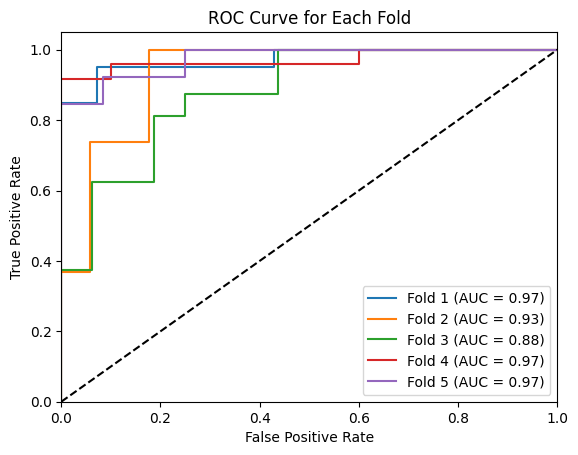

Best Parameters found:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 1024, 'learning_rate_init': 0.0001, 'max_iter': 5000, 'n_iter_no_change': 250, 'shuffle': False, 'solver': 'lbfgs', 'tol': 1e-05}


In [6]:
# Retrieve the best model from GridSearchCV
best_model = mlpc_cv_model.best_estimator_

roc_data = []


# Plot ROC curves for each fold using custom cv_splits
for fold, (train_idx, test_idx) in enumerate(cv_splits):
    X_train, X_test = train_data.iloc[train_idx], train_data.iloc[test_idx]
    y_train, y_test = train_labels[train_idx], train_labels[test_idx]

    # Fit the best model from GridSearchCV on the fold's training data
    best_model.fit(X_train, y_train)
    
    # Get predicted probabilities for the test set
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(fpr,tpr)
    # Plot ROC curve for this fold
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
        
    for f, t in zip(fpr, tpr):
        roc_data.append({'Fold': fold + 1, 'FPR': f, 'TPR': t})

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Fold')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Convert the list of dicts to a DataFrame
roc_df = pd.DataFrame(roc_data)

# Save to CSV for R use
roc_df.to_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/MLP_CV_ROC_Results.txt", sep = "\t", index=False)

# Optionally, print the best parameters found
print("Best Parameters found: ", mlpc_cv_model.best_params_)

In [7]:
mlpc_cv_model.best_estimator_

MLPClassifier(alpha=0.1, hidden_layer_sizes=1024, learning_rate_init=0.0001,
              max_iter=5000, n_iter_no_change=250, random_state=42,
              shuffle=False, solver='lbfgs', tol=1e-05)

In [8]:
results_models = pd.DataFrame(mlpc_cv_model.cv_results_)
results_models.to_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/MLP_CV_Results.txt", sep = "\t", index=False)

with open('/home/workspace/jogrady/ML4TB/work/models/Logistic_regression/MLP_Classifier.pkl', 'wb') as f:
    pickle.dump(mlpc_cv_model, f)

In [9]:
# Now onto predicting in the test data set
target_names = ['Control', 'Infected']
report = classification_report(test_labels.ravel(), mlpc_cv_model.predict(test_data), target_names=target_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()
Gene_cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_labels.ravel(), mlpc_cv_model.predict(test_data)), display_labels = ["Control", "Infected"])

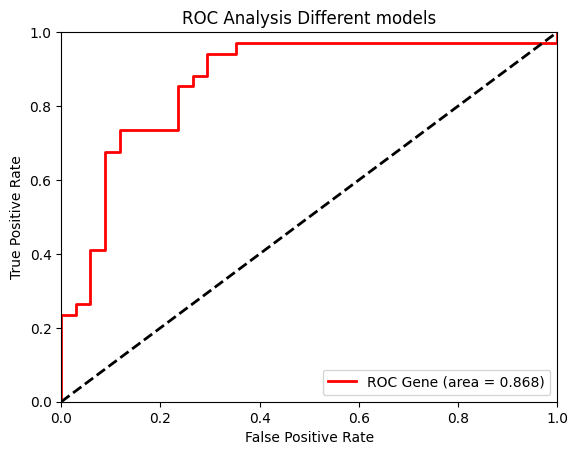

In [10]:
# predict continuous value
# For different decision thresholds
y_score_gene = mlpc_cv_model.predict_proba(test_data)
fprG_gene, tprG_gene, t_gene = roc_curve(test_labels.ravel(), y_score_gene[:,1])
roc_aucG_gene = auc(fprG_gene, tprG_gene)
plt.figure()
lw = 2
plt.plot(fprG_gene, tprG_gene, color='red',
         lw=lw, label='ROC Gene (area = %0.3f)' % roc_aucG_gene)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis Different models')
plt.legend(loc="lower right")

In [11]:

grady_master_df_predictions = pd.DataFrame({"Sample_id": test_data.index, "Original_labels": test_labels.ravel(), "MLP_prediction": mlpc_cv_model.predict(test_data)})

grady_master_df_predictions

,Sample_id,Original_labels,MLP_prediction
0,C007,0,0
1,C008,0,0
2,C011,0,0
3,C012,0,0
4,C014,0,0
...,...,...,...
63,A017_CON,0,1
64,A018_CON,0,0
65,A023_CON,0,0
66,A037_TB,1,1


## GBM

In [12]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_params = {"n_estimators": [10,50,100,200,500],
              "min_samples_split": [2,3,4,5,6,7],
              "min_samples_leaf": [1,3,5,7,9],
              "max_depth": [3,5,7,9,11],
              "max_features": ["sqrt", "log2"], 
              "tol": [0.0001, 0.00001, 0.000001],
              "learning_rate": [0.0001, 0.001, 0.1, 1]}
from sklearn.model_selection import GridSearchCV


precision_scorer = make_scorer(precision_score, zero_division=1)  # had to modify zero_division as it was giving problems
f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score)

# Define scoring dictionary for GridSearchCV
gbm = GradientBoostingClassifier(random_state = 42) # ANN model object created

# Model CV process 
gbm_cv_model = GridSearchCV(gbm, gbm_params, 
                         cv = cv_splits,
                         n_jobs = 50,
                         verbose = 1,
                         scoring=roc_auc_scorer)

gbm_cv_model.fit(train_data, train_labels.ravel()) 

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


GridSearchCV(cv=[(array([  0,   1,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  18,  20,  21,  22,  27,  28,  29,  30,  31,  32,  33,
        34,  37,  38,  39,  41,  42,  43,  44,  45,  47,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,
        66,  67,  68,  69,  71,  72,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125...
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=50,
             param_grid={'learning_rate': [0.0001, 0.001, 0.1, 1],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [10, 50, 100, 200, 500],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring=make_scorer(roc_auc_score, response_method='predict_proba'),
             verbose=1)

[0.         0.         0.         0.14285714 0.14285714 0.21428571
 0.21428571 0.28571429 0.28571429 1.        ] [0.   0.05 0.75 0.75 0.85 0.85 0.95 0.95 1.   1.  ]
[0.         0.         0.         0.11764706 0.11764706 0.17647059
 0.17647059 1.        ] [0.         0.05263158 0.57894737 0.57894737 0.94736842 0.94736842
 1.         1.        ]
[0.     0.     0.     0.125  0.125  0.5    0.5    0.8125 0.8125 1.    ] [0.     0.0625 0.75   0.75   0.875  0.875  0.9375 0.9375 1.     1.    ]
[0.  0.  0.  0.2 0.2 0.4 0.4 1. ] [0.         0.04166667 0.91666667 0.91666667 0.95833333 0.95833333
 1.         1.        ]
[0.         0.         0.         0.08333333 0.08333333 0.58333333
 0.58333333 1.        ] [0.         0.07692308 0.76923077 0.76923077 0.92307692 0.92307692
 1.         1.        ]


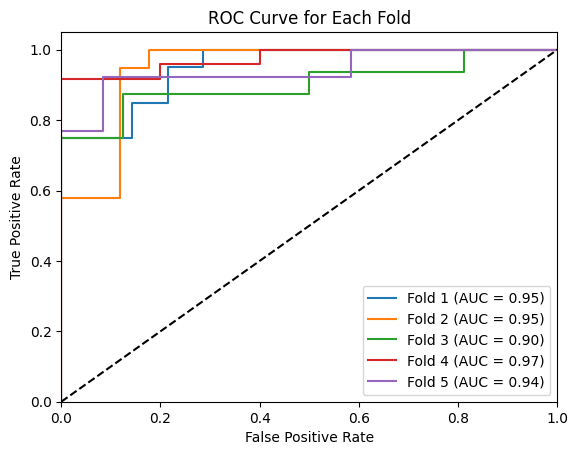

Best Parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200, 'tol': 0.0001}


In [13]:
# Retrieve the best model from GridSearchCV
gbm_best_model = gbm_cv_model.best_estimator_

roc_data = []


# Plot ROC curves for each fold using custom cv_splits
for fold, (train_idx, test_idx) in enumerate(cv_splits):
    X_train, X_test = train_data.iloc[train_idx], train_data.iloc[test_idx]
    y_train, y_test = train_labels[train_idx], train_labels[test_idx]

    # Fit the best model from GridSearchCV on the fold's training data
    gbm_best_model.fit(X_train, y_train)
    
    # Get predicted probabilities for the test set
    y_prob = gbm_best_model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(fpr,tpr)
    # Plot ROC curve for this fold
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
        
    for f, t in zip(fpr, tpr):
        roc_data.append({'Fold': fold + 1, 'FPR': f, 'TPR': t})

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Fold')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Convert the list of dicts to a DataFrame
roc_df = pd.DataFrame(roc_data)

# Save to CSV for R use
roc_df.to_csv("/home/workspace/jogrady/ML4TB/work/merged/Temp_files/GBM_CV_ROC_Results.txt", sep = "\t", index=False)

# Optionally, print the best parameters found
print("Best Parameters found: ", gbm_cv_model.best_params_)

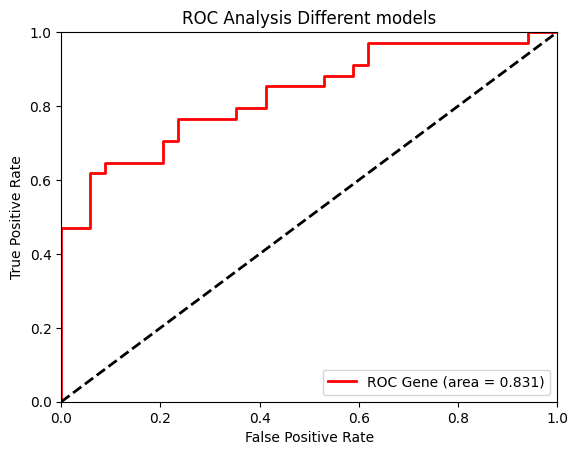

In [14]:
# predict continuous value
# For different decision thresholds
y_score_gene = gbm_cv_model.predict_proba(test_data)
fprG_gene, tprG_gene, t_gene = roc_curve(test_labels.ravel(), y_score_gene[:,1])
roc_aucG_gene = auc(fprG_gene, tprG_gene)
plt.figure()
lw = 2
plt.plot(fprG_gene, tprG_gene, color='red',
         lw=lw, label='ROC Gene (area = %0.3f)' % roc_aucG_gene)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis Different models')
plt.legend(loc="lower right")

# NN

In [ ]:

nn_params = {"alpha": [0.1, 0.01, 0.0001,0.00001],
              "hidden_layer_sizes": hidden_layer_combinations,
              "solver" : ["adam","sgd"],
              "activation": ["logistic", "tanh", "relu"],
              "max_iter": [(1000)],
              "n_iter_no_change": [(50)],
              "tol": [(0.0001)],
              "shuffle": [False],
              "learning_rate_init": [(0.0001)]}
from sklearn.model_selection import GridSearchCV


precision_scorer = make_scorer(precision_score, zero_division=1)  # had to modify zero_division as it was giving problems
f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)
recall_scorer = make_scorer(recall_score)

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, response_method="predict_proba")

# Define scoring dictionary for GridSearchCV
nn = MLPClassifier(random_state = 42) # ANN model object created

# Model CV process 
nn_cv_model = GridSearchCV(nn, nn_params, 
                         cv = cv_splits, # To make a 5-fold CV
                         n_jobs = 50, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2,
                         scoring=roc_auc_scorer) # Controls the level of detail: higher means more messages gets value as integer.

nn_cv_model.fit(train_data, train_labels.ravel()) 

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(32, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.292 total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(64, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.663 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(32, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.375 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(64, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.454 total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(32, 16, 8), learning_rate_i

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.875 total time=   9.4s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.171 total time=   1.2s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.141 total time=   7.5s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.483 total time=   1.2s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=F

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.929 total time=  11.6s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.910 total time=  11.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.645 total time=   7.8s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.917 total time=  11.2s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuf

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.925 total time=  14.9s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.923 total time=  14.1s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.907 total time=  15.5s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.923 total time=  16.0s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.925 total time=  15.8s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.830 total time=   9.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.929 total time=  11.0s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.910 total time=  16.7s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.950 total time=  16.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.871 total time=  17.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.913 total time=  18.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.917 total time=  12.3s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.950 total time=  19.9s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.882 total time=  10.2s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.875 total time=  18.8s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.875 total time=  19.5s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.861 total time=  14.1s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.954 total time=  19.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.785 total time=  17.2s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.771 total time=  10.9s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.579 total time=   2.2s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shu

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.883 total time=  24.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.336 total time=   4.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.910 total time=  24.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.295 total time=   2.7s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.954 total time=  24.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.731 total time=  13.2s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.925 total time=  25.4s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(128, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.917 total time=  25.4s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.917 total time=  13.3s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.836 total time=  14.9s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.160 total time=   2.6s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.342 total time=   2.6s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.378 total time=   2.7s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, s

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.667 total time=   2.3s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.715 total time=   2.7s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.238 total time=  13.5s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.604 total time=   2.7s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuf

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.812 total time=  15.5s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.364 total time=   1.8s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.917 total time=  26.6s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.923 total time=  15.3s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.736 total time=  18.9s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.963 total time=  19.2s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shu

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.929 total time=  35.7s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.871 total time=  35.8s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.910 total time=  36.3s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.954 total time=  36.4s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.683 total time=   3.3s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.889 total time=  42.9s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.707 total time=  14.8s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.917 total time=  32.0s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.929 total time=  31.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.929 total time=  31.7s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.586 total time=   2.7s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.916 total time=  53.1s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.925 total time=  54.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.288 total time=   2.6s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.954 total time=  54.2s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.883 total time=  54.7s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.933 total time=  31.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.939 total time=  31.7s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.371 total time=   2.7s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.458 total time=   2.7s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.954 total time=  44.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.863 total time=  39.8s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.614 total time=   2.8s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.635 total time=   2.7s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.566 total time=   2.8s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.949 total time=  32.9s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.958 total time=  55.3s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.571 total time=   3.5s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.450 total time=   4.3s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.680 total time=  30.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=F

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.925 total time=  48.9s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.339 total time=  36.4s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.429 total time=  33.3s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.910 total time=  48.6s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.396 total time=  32.2s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.583 total time=  28.4s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.939 total time=  41.8s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.954 total time=  48.9s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.526 total time=   8.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.340 total time=   3.5s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuf

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.933 total time=  49.6s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.916 total time=  50.2s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.875 total time=  51.3s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.389 total time=  45.1s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.867 total time=  48.7s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 16), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.365 total time=  11.8s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.368 total time=   8.3s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 128, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.264 total time=   3.7s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 32, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuff

/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.923 total time= 1.0min
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 64, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.233 total time=  20.5s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 32), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.949 total time= 1.0min
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.337 total time=  59.0s


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.938 total time= 1.1min
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.933 total time= 1.1min


/home/workspace/jogrady/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=adam, tol=0.0001;, score=0.871 total time= 1.1min
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.455 total time= 1.0min
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.321 total time= 1.0min
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 16, 8), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffle=False, solver=sgd, tol=0.0001;, score=0.484 total time= 1.1min
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(512, 128, 64), learning_rate_init=0.0001, max_iter=1000, n_iter_no_change=50, shuffl